In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

df.drop(columns=['Id'], inplace=True)

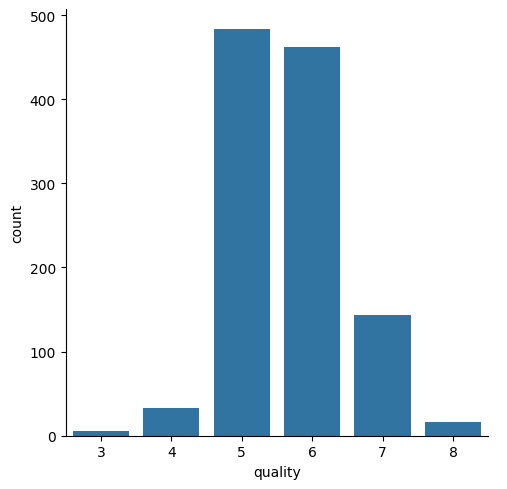

In [7]:
sns.catplot(x="quality", data= df, kind='count')

<Axes: >

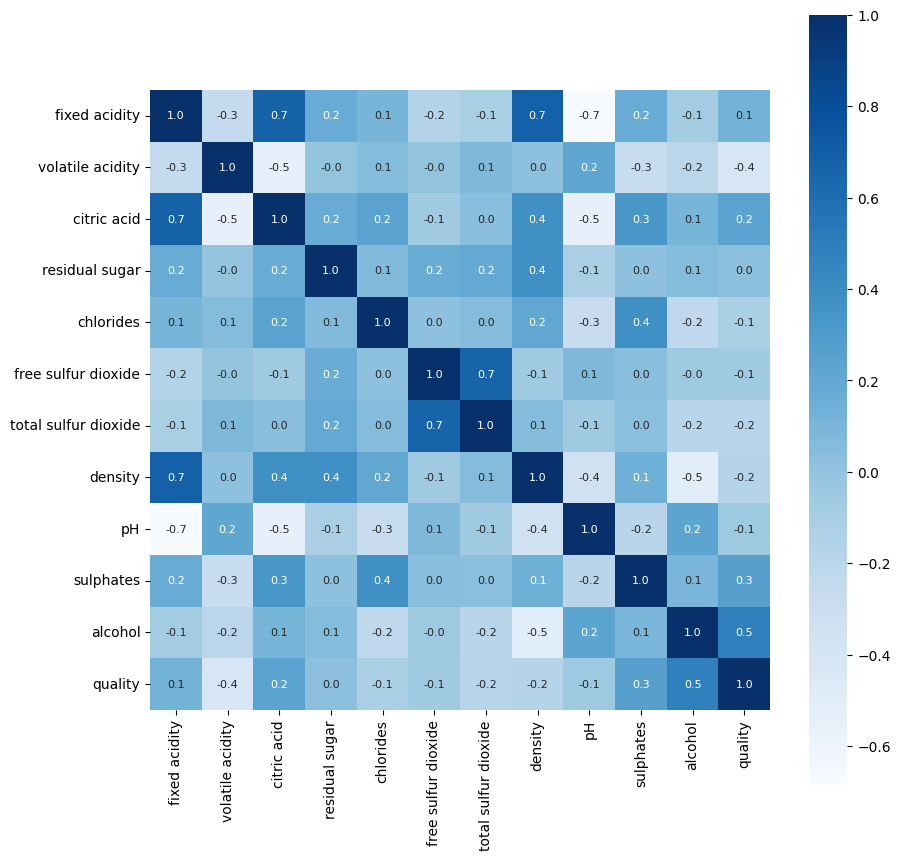

In [8]:
correlation = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap= "Blues")


In [9]:
feature = df.drop(columns=['quality'])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(feature), columns=feature.columns)

In [11]:
df_scaled['quality'] = df['quality'].values

In [12]:
df_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1143.000000
mean,-3.729883e-16,4.475860e-16,2.486589e-17,1.554118e-16,8.081413e-17,-5.594825e-17,9.946355e-17,5.783805e-14,-8.454402e-16,4.973178e-17,-1.193563e-15,5.657043
std,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,0.805824
min,-2.124483e+00,-2.290883e+00,-1.365027e+00,-1.204252e+00,-1.585988e+00,-1.426458e+00,-1.218108e+00,-3.461348e+00,-3.646432e+00,-1.924024e+00,-1.887834e+00,3.000000
25%,-6.933192e-01,-7.732388e-01,-9.072439e-01,-4.664214e-01,-3.583880e-01,-8.408632e-01,-7.603412e-01,-6.030539e-01,-6.769982e-01,-6.323694e-01,-8.709366e-01,5.000000
50%,-2.353469e-01,-6.314838e-02,-9.340780e-02,-2.450722e-01,-1.678983e-01,-2.552689e-01,-2.720568e-01,-2.619819e-02,-6.480857e-03,-2.213884e-01,-2.238203e-01,6.000000
75%,4.516116e-01,6.051720e-01,7.712930e-01,5.006018e-02,6.492241e-02,5.255235e-01,4.603699e-01,5.792404e-01,5.682483e-01,4.244390e-01,6.081863e-01,6.000000
max,4.344377e+00,5.840349e+00,3.721449e+00,9.568078e+00,1.109216e+01,5.112679e+00,7.418423e+00,3.616827e+00,4.463634e+00,7.880809e+00,4.121103e+00,8.000000


In [13]:
X = df.drop('quality', axis=1)

In [14]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>6 else 0)
print(Y.unique())

[0 1]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=0.2, random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=0.2, random_state=42)

In [17]:
Y_dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(Y_test, Y_dt_pred))

Decision Tree Accuracy: 0.8777292576419214


Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rt_model = RandomForestClassifier()
rt_model.fit(X_train, Y_train)

RandomForestClassifier()

In [19]:
Y_rt_pred = rt_model.predict(X_test)
print("Random Forest accuracy: ", accuracy_score(Y_test, Y_rt_pred))

Random Forest accuracy:  0.925764192139738


K Means

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(X)


In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

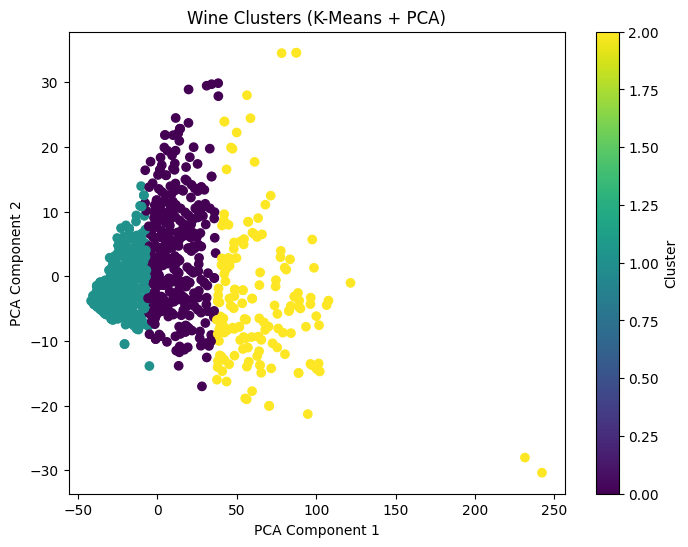

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_scaled['cluster'], cmap='viridis')
plt.title("Wine Clusters (K-Means + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()